In [1]:
#default_exp dicom_utils

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
#export
from fastai.basics import *
from fastai.medical.imaging import *

from pydicom.pixel_data_handlers import apply_voi_lut

In [5]:
#export
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

/home/karrrrrrrr/miniconda3/envs/fastai/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
path = Path('/media/veracrypt1/Data Science/SIIM-Imgs/dicom')

In [7]:
dicom_train = get_dicom_files(path / 'train')
dicom_test = get_dicom_files(path / 'test')

In [8]:
dicom_train[:5].attrgot('name')

(#5) ['65761e66de9f.dcm','51759b5579bc.dcm','f6293b1c49e2.dcm','3019399c31f4.dcm','bb4b1da810f3.dcm']

In [9]:
print(len(dicom_train), len(dicom_test))

6334 1263


In [10]:
#df_dicom_train = pd.DataFrame.from_dicoms(dicom_train, px_summ = True)
df_dicom_train = pd.read_csv('src/dicom_meta_train.csv', index_col = 0)

In [11]:
df_dicom_train.head()

SpecificCharacterSet ImageType   SOPClassUID SOPInstanceUID     StudyDate  \
0           ISO_IR 100  ORIGINAL  71228e4340de   65761e66de9f  4545ba78b753   
1           ISO_IR 100   DERIVED  71228e4340de   51759b5579bc  96fc21dd2b1f   
2           ISO_IR 100   DERIVED  71228e4340de   f6293b1c49e2  1f56c43c7013   
3           ISO_IR 100  ORIGINAL  03a65300fa41   3019399c31f4  ddf027d7b0c3   
4           ISO_IR 100  ORIGINAL  71228e4340de   bb4b1da810f3  1c32dde11675   

      StudyTime AccessionNumber Modality Unnamed: 9   PatientName  ...  \
0  bf1677526b2b    5f20f119e3df       DX      GEIIS  d47cea7a3b93  ...   
1  13e700cac7f0    0dc10cf540cf       DX      GEIIS  3a0c965d2601  ...   
2  294ed222fa5d    1be0f8c7b013       DX      GEIIS  1417afaebcd5  ...   
3  785c3211e473    945fc15b5c17       CR        NaN  131d070c6f41  ...   
4  8f84b72617c5    fed2df239255       DX        NaN  f1b9712cfd0f  ...   

  img_max      img_mean      img_std img_pct_window ImageType3  ImageType4  \
0    3775   2110.230140   856.027656       0.003751        NaN         NaN   
1    4095   2314.855532   861.247892       0.003027        NaN         NaN   
2    3799   2197.066530  1033.735578       0.030716        NaN         NaN   
3    3235   2176.042170   376.051855       0.000000        NaN         NaN   
4   26027  16608.547898  3676.845318       0.000000        NaN         NaN   

  ImageType5 ImageType6 ImageType7  ImageType8  
0        NaN        NaN        NaN         NaN  
1        NaN        NaN        NaN         NaN  
2        NaN        NaN        NaN         NaN  
3        NaN        NaN        NaN         NaN  
4        NaN        NaN        NaN         NaN  

[5 rows x 52 columns]

In [12]:
#df_dicom_train.to_csv('src/dicom_meta_train.csv')

In [13]:
#df_dicom_test = pd.DataFrame.from_dicoms(dicom_test, px_summ = True)
df_dicom_test = pd.read_csv('src/dicom_meta_test.csv', index_col = 0)

In [14]:
df_dicom_test.head()

SpecificCharacterSet ImageType   SOPClassUID SOPInstanceUID     StudyDate  \
0           ISO_IR 100  ORIGINAL  03a65300fa41   9603112b4c2e  63d9c1aa5ef7   
1           ISO_IR 100  ORIGINAL  03a65300fa41   3dcdfc352a06  cada73552f2d   
2           ISO_IR 100  ORIGINAL  71228e4340de   c39146cbda47  77a1800cc83e   
3           ISO_IR 100  ORIGINAL  03a65300fa41   951211f8e1bb  96fc21dd2b1f   
4           ISO_IR 100   DERIVED  71228e4340de   5e0e7acd9c7d  233953e200d9   

      StudyTime AccessionNumber Modality   PatientName     PatientID  ...  \
0  62b98286888c    4d3ac57eeaa0       CR  d1a2eaf4a06b  305ede2c4e48  ...   
1  aa1e61c343c6    650c486678b5       CR  11c7067a2eb8  180a110dcd8d  ...   
2  dd8315fd766b    240468150285       DX  7427a3160745  3eeeba361a27  ...   
3  99aaab52cf5c    0c1dd9885ca2       CR  ff151d02f64d  3f1b30664756  ...   
4  b3bae96efce2    e28594ecb373       DX  9adc27eed56e  60303f3a94cc  ...   

       img_std img_pct_window Unnamed: 45 ImageType2  ImageType3 ImageType4  \
0  1016.233325       0.007267         NaN        NaN         NaN        NaN   
1    70.325027       0.122678         NaN        NaN         NaN        NaN   
2  1101.091674       0.023483         NaN        NaN         NaN        NaN   
3    65.155280       0.153265       GEIIS        NaN         NaN        NaN   
4   643.587563       0.000225       GEIIS        NaN         NaN        NaN   

  ImageType5 ImageType6  ImageType7  ImageType8  
0        NaN        NaN         NaN         NaN  
1        NaN        NaN         NaN         NaN  
2        NaN        NaN         NaN         NaN  
3        NaN        NaN         NaN         NaN  
4        NaN        NaN         NaN         NaN  

[5 rows x 52 columns]

In [15]:
#df_dicom_test.to_csv('src/dicom_meta_test.csv')

---

In [16]:
df_train = pd.read_pickle('src/train_clean.pkl')

df_train_compact = df_train[['id', 'Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']].copy()
df_train_compact.columns = ['SOPInstanceUID', 'negative', 'typical', 'indeterminate', 'atypical']

In [44]:
df_train_compact.head()

SOPInstanceUID  negative  typical  indeterminate  atypical
0   000a312787f2         0        1              0         0
1   000c3a3f293f         1        0              0         0
2   0012ff7358bc         0        1              0         0
3   001398f4ff4f         0        0              0         1
4   001bd15d1891         0        1              0         0

In [45]:
comb = df_dicom_train.merge(df_train_compact, on = 'SOPInstanceUID')

In [46]:
comb.head()

SpecificCharacterSet ImageType   SOPClassUID SOPInstanceUID     StudyDate  \
0           ISO_IR 100  ORIGINAL  71228e4340de   65761e66de9f  4545ba78b753   
1           ISO_IR 100   DERIVED  71228e4340de   51759b5579bc  96fc21dd2b1f   
2           ISO_IR 100   DERIVED  71228e4340de   f6293b1c49e2  1f56c43c7013   
3           ISO_IR 100  ORIGINAL  03a65300fa41   3019399c31f4  ddf027d7b0c3   
4           ISO_IR 100  ORIGINAL  71228e4340de   bb4b1da810f3  1c32dde11675   

      StudyTime AccessionNumber Modality Unnamed: 9   PatientName  ...  \
0  bf1677526b2b    5f20f119e3df       DX      GEIIS  d47cea7a3b93  ...   
1  13e700cac7f0    0dc10cf540cf       DX      GEIIS  3a0c965d2601  ...   
2  294ed222fa5d    1be0f8c7b013       DX      GEIIS  1417afaebcd5  ...   
3  785c3211e473    945fc15b5c17       CR        NaN  131d070c6f41  ...   
4  8f84b72617c5    fed2df239255       DX        NaN  f1b9712cfd0f  ...   

  ImageType3 ImageType4 ImageType5 ImageType6 ImageType7  ImageType8 negative  \
0        NaN        NaN        NaN        NaN        NaN         NaN        0   
1        NaN        NaN        NaN        NaN        NaN         NaN        0   
2        NaN        NaN        NaN        NaN        NaN         NaN        1   
3        NaN        NaN        NaN        NaN        NaN         NaN        1   
4        NaN        NaN        NaN        NaN        NaN         NaN        0   

  typical indeterminate  atypical  
0       1             0         0  
1       0             0         1  
2       0             0         0  
3       0             0         0  
4       0             0         1  

[5 rows x 56 columns]

In [47]:
comb.head().T

0  \
SpecificCharacterSet                                                                                                                                                                                                                                                                                                                                       ISO_IR 100   
ImageType                                                                                                                                                                                                                                                                                                                                                    ORIGINAL   
SOPClassUID                                                                                                                                                                                                                                                                                                                                              71228e4340de   
SOPInstanceUID                                                                                                                                                                                                                                                                                                                                           65761e66de9f   
StudyDate                                                                                                                                                                                                                                                                                                                                                4545ba78b753   
StudyTime                                                                                                                                                                                                                                                                                                                                                bf1677526b2b   
AccessionNumber                                                                                                                                                                                                                                                                                                                                          5f20f119e3df   
Modality                                                                                                                                                                                                                                                                                                                                                           DX   
Unnamed: 9                                                                                                                                                                                                                                                                                                                                                      GEIIS   
PatientName                                                                                                                                                                                                                                                                                                                                              d47cea7a3b93   
PatientID                                                                                                                                                                                                                                                                                                                                                7d3bf0aef747   
PatientSex              

In [48]:
repr_flds = ['BitsStored', 'PhotometricInterpretation']
vals = ['img_mean', 'img_max', 'img_min', 'PatientID', 'negative']

comb.pivot_table(values = vals, 
                           index = repr_flds,
                           aggfunc = {'img_mean': 'mean', 'img_max': 'max',
                                      'img_min': 'min', 'PatientID': 'count',
                                      'negative': 'mean'
                                     }
                          )

PatientID  img_max      img_mean  \
BitsStored PhotometricInterpretation                                     
8          MONOCHROME2                      401      255    133.808528   
10         MONOCHROME1                        3     1023    478.364239   
12         MONOCHROME1                      294     4095   2104.040914   
           MONOCHROME2                     4017     4095   2098.577129   
13         MONOCHROME2                        3     8191   2184.953836   
14         MONOCHROME1                        1    16383   1669.622578   
           MONOCHROME2                      209    16383   5920.875510   
15         MONOCHROME1                     1240    32767  16433.900958   
16         MONOCHROME1                      163    65535  25463.760529   
           MONOCHROME2                        3    65535  18429.929306   

                                      img_min  negative  
BitsStored PhotometricInterpretation                     
8          MONOCHROME2                      0  0.127182  
10         MONOCHROME1                      0  0.333333  
12         MONOCHROME1                      0  0.346939  
           MONOCHROME2                      0  0.300224  
13         MONOCHROME2                      0  0.333333  
14         MONOCHROME1                    294  0.000000  
           MONOCHROME2                      0  0.253589  
15         MONOCHROME1                      0  0.239516  
16         MONOCHROME1                      0  0.134969  
           MONOCHROME2                      0  1.000000

In [49]:
train_lookup = pd.DataFrame({'SOPInstanceUID': fn.stem, 'fn': fn} for fn in dicom_train)
test_lookup = pd.DataFrame({'SOPInstanceUID': fn.stem, 'fn': fn} for fn in dicom_test)

In [50]:
train_lookup.head()

SOPInstanceUID  \
0   65761e66de9f   
1   51759b5579bc   
2   f6293b1c49e2   
3   3019399c31f4   
4   bb4b1da810f3   

                                                                                                fn  
0  /media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/00086460a852/9e8302230c91/65761e66de9f.dcm  
1  /media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/000c9c05fd14/e555410bd2cd/51759b5579bc.dcm  
2  /media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/00292f8c37bd/73120b4a13cb/f6293b1c49e2.dcm  
3  /media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/005057b3f880/e34afce999c5/3019399c31f4.dcm  
4  /media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/0051d9b12e72/152f6ec68d86/bb4b1da810f3.dcm

In [51]:
df_8_2 = comb.query('(BitsStored == 8)')
df_10_1 = comb.query('(BitsStored == 10)')
df_12_1 = comb.query('(BitsStored == 12) & (PhotometricInterpretation == "MONOCHROME1")')
df_12_2 = comb.query('(BitsStored == 12) & (PhotometricInterpretation == "MONOCHROME2")')
df_13_2 = comb.query('(BitsStored == 13)')
df_14_1 = comb.query('(BitsStored == 14 & (PhotometricInterpretation == "MONOCHROME1"))')
df_14_2 = comb.query('(BitsStored == 14 & (PhotometricInterpretation == "MONOCHROME2"))')
df_15_1 = comb.query('(BitsStored == 15)')
df_16_1 = comb.query('(BitsStored == 16 & (PhotometricInterpretation == "MONOCHROME1"))')
df_16_2 = comb.query('(BitsStored == 16 & (PhotometricInterpretation == "MONOCHROME2"))')

dfs = [df_8_2, df_10_1, df_12_1, df_12_2, df_13_2, df_14_1, df_14_2, df_15_1, df_16_1, df_16_2]

In [52]:
#export
def get_fns(df, stage = 'train'):
    if stage == 'train':
        lookup = train_lookup
    else:
        lookup = test_lookup
    return lookup[lookup.SOPInstanceUID.isin(df['SOPInstanceUID'].values)]['fn'].values

In [53]:
samples = [df.sample(min(12,len(df))) for df in dfs]

In [54]:
get_fns(samples[1])

array([Path('/media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/a20f42a2f5b0/0c8402f2be59/a422012bf2b1.dcm'),
       Path('/media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/106749939445/c1e585fd28d2/786ec68934b4.dcm'),
       Path('/media/veracrypt1/Data Science/SIIM-Imgs/dicom/train/4463659093ea/264cfb1f94be/3afaceb34345.dcm')],
      dtype=object)

In [55]:
#export
def cut_outliers(arr):
    ### find a better name for this func...
    bins = np.histogram(arr.flatten(), bins = 100)
    bins_pct = bins[0] / bins[0].sum()
    bins_csum = bins_pct.cumsum()
    
    mid_idx = (bins_csum > 0.5).argmax()
    right_of_mid = bins_pct[mid_idx:]
    left_of_mid = bins_pct[:mid_idx]
    
    ## cut top
    if mid_idx < len(bins_pct):
        cut_sub = (right_of_mid <= 1e-9).argmax()
        if cut_sub == 0:
            return arr
        cut_idx = cut_sub + mid_idx ## The first bin, that contains very little values
        cut_value = bins[1][cut_idx] ## The upper bound of the last bin, that contained enough values
        arr[arr > cut_value] = cut_value
    
    ## cut bottom
    if mid_idx > 0:
        cut_sub = np.flip(left_of_mid <= 1e-9).argmax()
        if cut_sub == 0:
            return arr
        cut_idx = len(left_of_mid) - cut_sub
        cut_value = bins[1][cut_idx]
        arr[arr < cut_value] = cut_value
    
    return arr

In [86]:
#export
def cut_m(arr, mode = 'min'):
    from scipy.ndimage import gaussian_filter
    arr_blurr = gaussian_filter(arr, sigma = 30)
    mean_x, mean_y = arr_blurr.mean(axis = 0), arr_blurr.mean(axis = 1)
    rows, cols = arr.shape
    ε = 0.1 * arr.max()
    if mode == 'max':
        op = le
        thresh = arr_blurr.max() - ε
    else:
        op = ge
        thresh = arr_blurr.min() + ε

    x_lo = op(mean_x, thresh).argmax()
    x_hi = cols - np.flip(op(mean_x, thresh)).argmax()
    y_lo = op(mean_y, thresh).argmax()
    y_hi = rows - np.flip(op(mean_y, thresh)).argmax()
    
    tl = np.array([x_lo, y_lo])
    br = (x_hi, y_hi)
    
    return arr[y_lo:y_hi, x_lo:x_hi], tl, br

In [87]:
#export
def cut_frame(arr):
    arr, tl_1, br_1 = cut_m(arr, 'min')
    arr, tl_2, br_2 = cut_m(arr, 'max')
    return arr, tuple(tl_1 + tl_2), br_2

In [58]:
#export
def fix_monochrome(arr):
    return arr.max() - arr

In [59]:
#export
def normalize(arr):
    return (arr - arr.min())/ arr.max()

---

## Get an average histogram

In [60]:
#export
def my_freqhist_bins(arr, trs = [0.,0.2,0.4,0.5,0.6,0.7,0.8,1.1], n_bins = 100):
    sub_arrs = []
    for i in range(len(trs)-1):
        #print(f'{trs[i]} to {trs[i+1]}:')
        lower_bound = arr >= trs[i]
        upper_bound = arr < trs[i+1]
        #print('sorting...')
        sliced_arr = arr[lower_bound & upper_bound]
        sliced_arr.sort()
        sub_arrs.append(sliced_arr)
        #print('done!')
    sorted_arr = np.concatenate(sub_arrs)
    assert(len(sorted_arr) == len(arr))
        
    t = np.concatenate(
        [np.array([0.001]),
         np.arange(n_bins)/n_bins+(1/2/n_bins),
         np.array([0.999])
        ])
    idxs = (t * len(sorted_arr)).astype(np.long)
    return np.unique(sorted_arr[idxs])

In [61]:
#export
def my_hist_scaled(self, brks):
    ys = np.linspace(0., 1., len(brks))
    x = np.interp(self.flatten(), brks, ys)
    return x.reshape(self.shape)

In [77]:
#export
def process_dcm(dcm, process = True, bins = None):
    arr = apply_voi_lut(dcm.pixel_array, dcm)
    if process == False:
        return arr, None, None
    if dcm.PhotometricInterpretation == "MONOCHROME1":
        arr = fix_monochrome(arr)
    ##arr, tl, br = cut_frame(arr)
    arr = cut_outliers(arr)
    arr = normalize(arr)
    #arr = my_hist_scaled(arr, bins)
    
    #return (arr, tl, br)
    return arr   

In [63]:
save = False
if save:
    smps = comb.sample(n = 100)
    fns = get_fns(smps)

    arrs = [process_dcm(fn.dcmread())[0].flatten() for fn in fns]
    single_arr = np.concatenate(arrs)

    bins = my_freqhist_bins(single_arr)

    np.save('data/freqhist_bins', my_bins)
if not save:
    bins = np.load('data/freqhist_bins.npy')

In [64]:
#export
def show_hist(s, process = True):
    fns = get_fns(s)
    
    m = 1 if len(s) <= 3 else 4
    n = 1 if len(s) == 1 else 3
    fig, axs = plt.subplots(m,n, figsize = (20,15))
    if n == 1:
        dcm = fns[0].dcmread()         
        arr, tl, br = process_dcm(dcm, process = process, bins = bins)
        axs.hist(arr.flatten())
    else:
        axs = axs.flatten()
    
        for i,ax in enumerate(axs):
            dcm = fns[i].dcmread()
            arr, tl, br = process_dcm(dcm, process = process, bins = bins)
            ax.hist(arr.flatten())

In [65]:
#export
def compare_hists(s):
    fns = get_fns(s)

    fig, axs = plt.subplots(len(fns), 2, figsize = (15,30))

    for i,fn in enumerate(fns):
        dcm = fn.dcmread()
        arr = dcm.pixel_array
        axs[i, 0].hist(arr.flatten())
        
        arr, tl, br = process_dcm(dcm, bins = bins)
        axs[i, 1].hist(arr.flatten())    

In [66]:
#export
def compare_raws(s):
    fns = get_fns(s)

    fig, axs = plt.subplots(len(fns), 2, figsize = (10,50))

    for i,fn in enumerate(fns):
        dcm = fn.dcmread()
        arr = dcm.pixel_array
        axs[i, 0].imshow(arr, cmap = plt.cm.bone)
        
        arr, tl, br = process_dcm(dcm, bins = bins)
        axs[i, 1].imshow(arr, cmap = plt.cm.bone) 

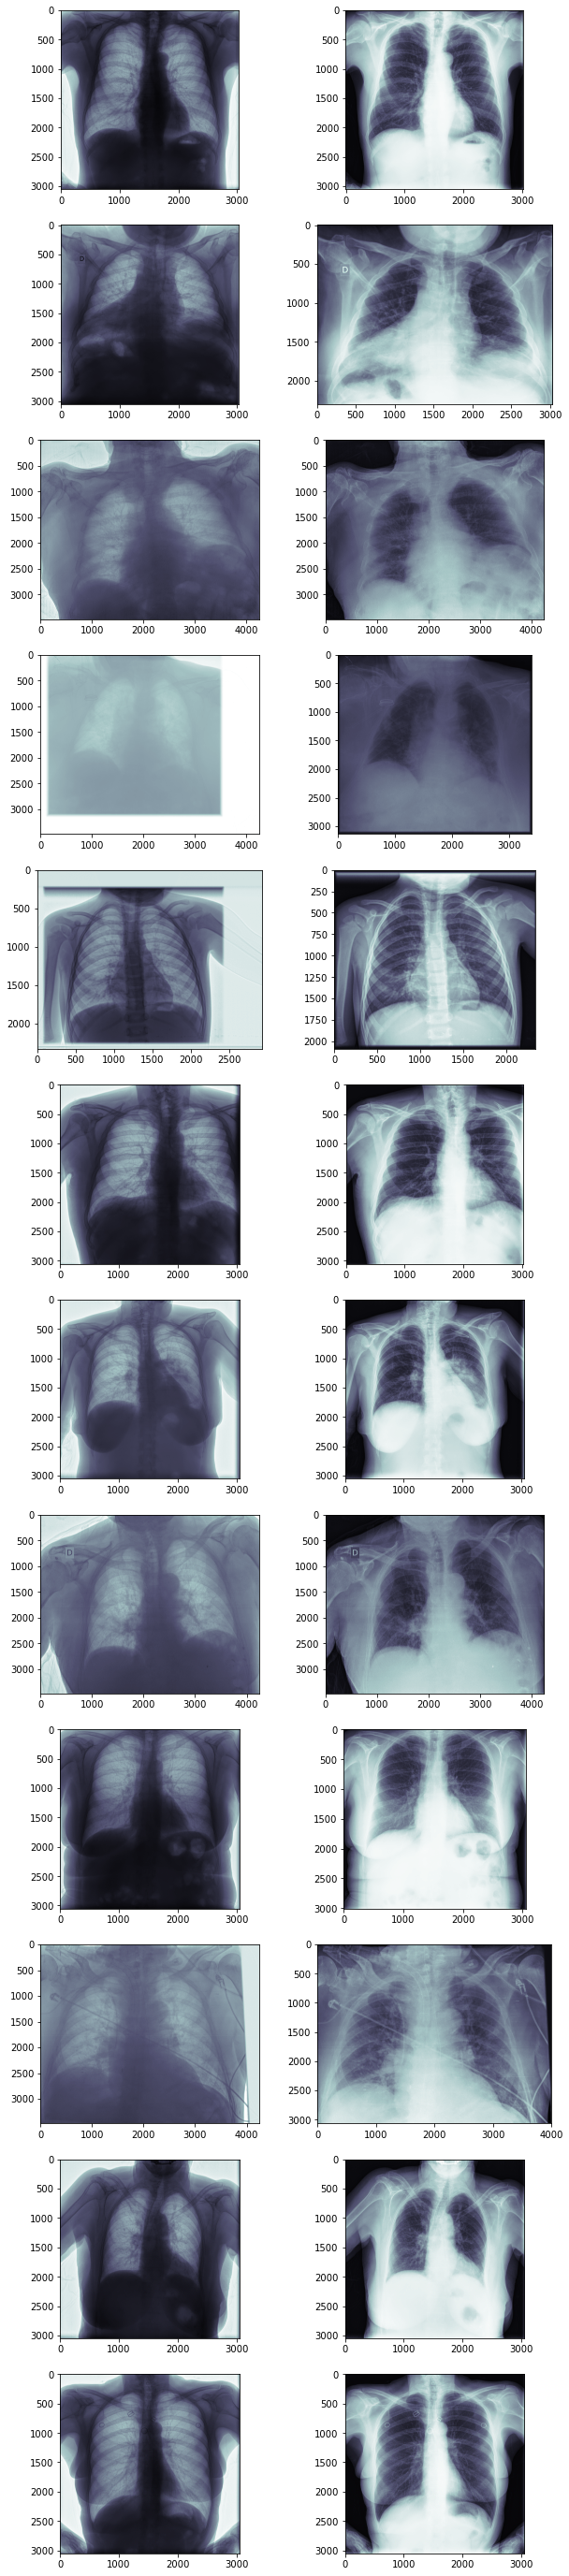

In [78]:
compare_raws(samples[2])

In [70]:
#export
def show_raw(s, process = True):
    fns = get_fns(s)
    
    m = 1 if len(s) <= 3 else 4
    n = 1 if len(s) == 1 else 3
    fig, axs = plt.subplots(m,n, figsize = (20,15))
    if n == 1:
        dcm = fns[0].dcmread()         
        arr, tl, br = process_dcm(dcm, process = process, bins = bins)
        axs.imshow(arr, cmap = plt.cm.bone)
        axs.axis('off')
    else:
        axs = axs.flatten()
    
        for i,ax in enumerate(axs):
            dcm = fns[i].dcmread()
            arr, tl, br = process_dcm(dcm, process = process, bins = bins)
            ax.imshow(arr, cmap = plt.cm.bone)
            ax.axis('off')

In [76]:
samples[5]

SpecificCharacterSet ImageType   SOPClassUID SOPInstanceUID  \
4465           ISO_IR 100  ORIGINAL  03a65300fa41   3d12cb6aad8b   

         StudyDate     StudyTime AccessionNumber Modality Unnamed: 9  \
4465  364e93fa20e4  cc876642e7d0    fef9f7592024       CR        NaN   

       PatientName  ... ImageType3 ImageType4 ImageType5 ImageType6  \
4465  0ab6e44d34d2  ...        NaN        NaN        NaN        NaN   

     ImageType7  ImageType8 negative typical indeterminate  atypical  
4465        NaN         NaN        0       0             1         0  

[1 rows x 56 columns]

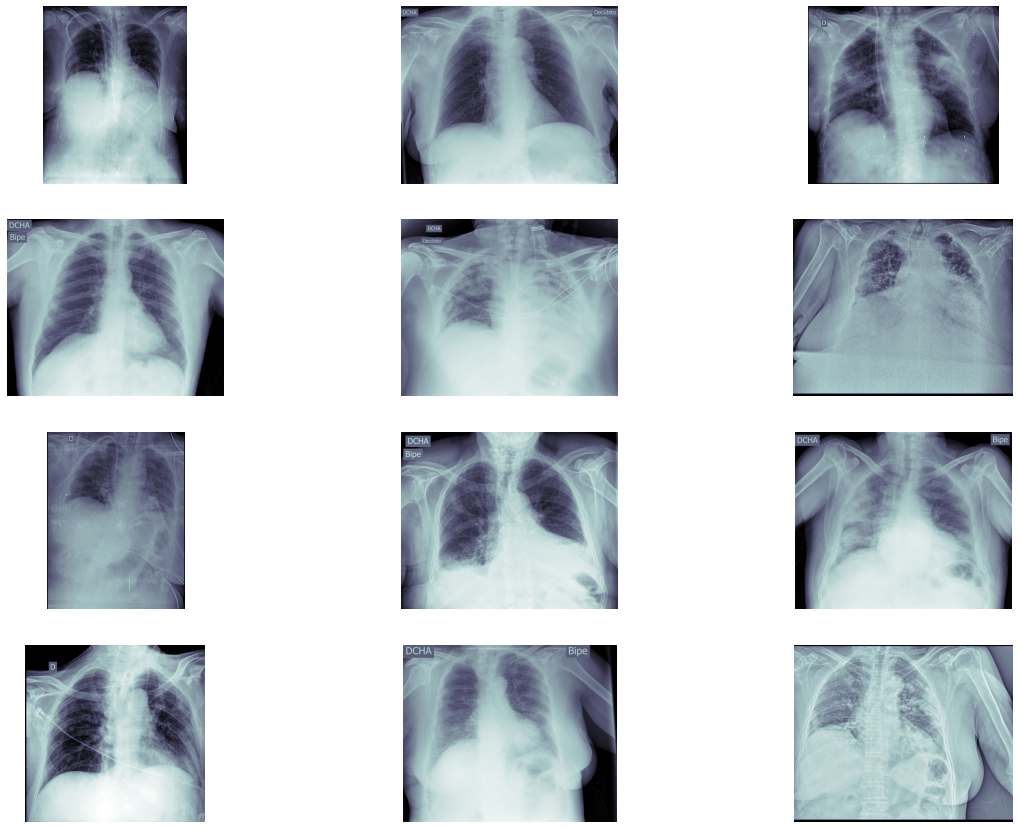

In [71]:
i = 0
show_raw(samples[i])

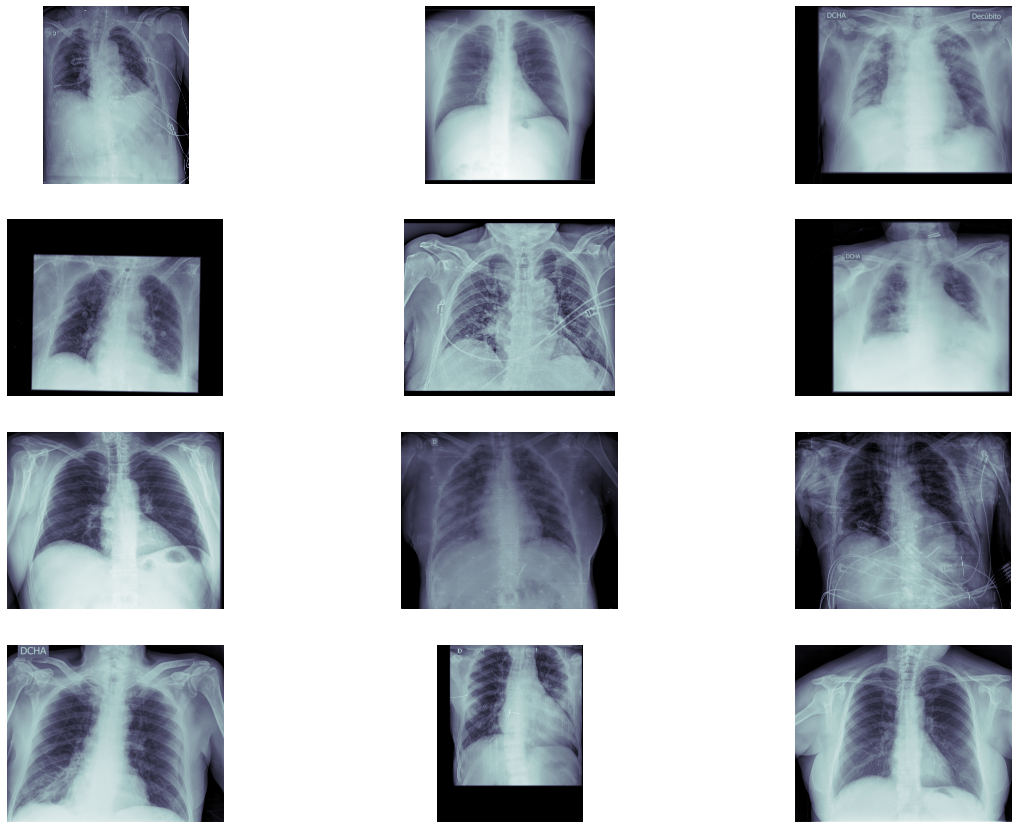

In [90]:
show_raw(samples[i], process = False)

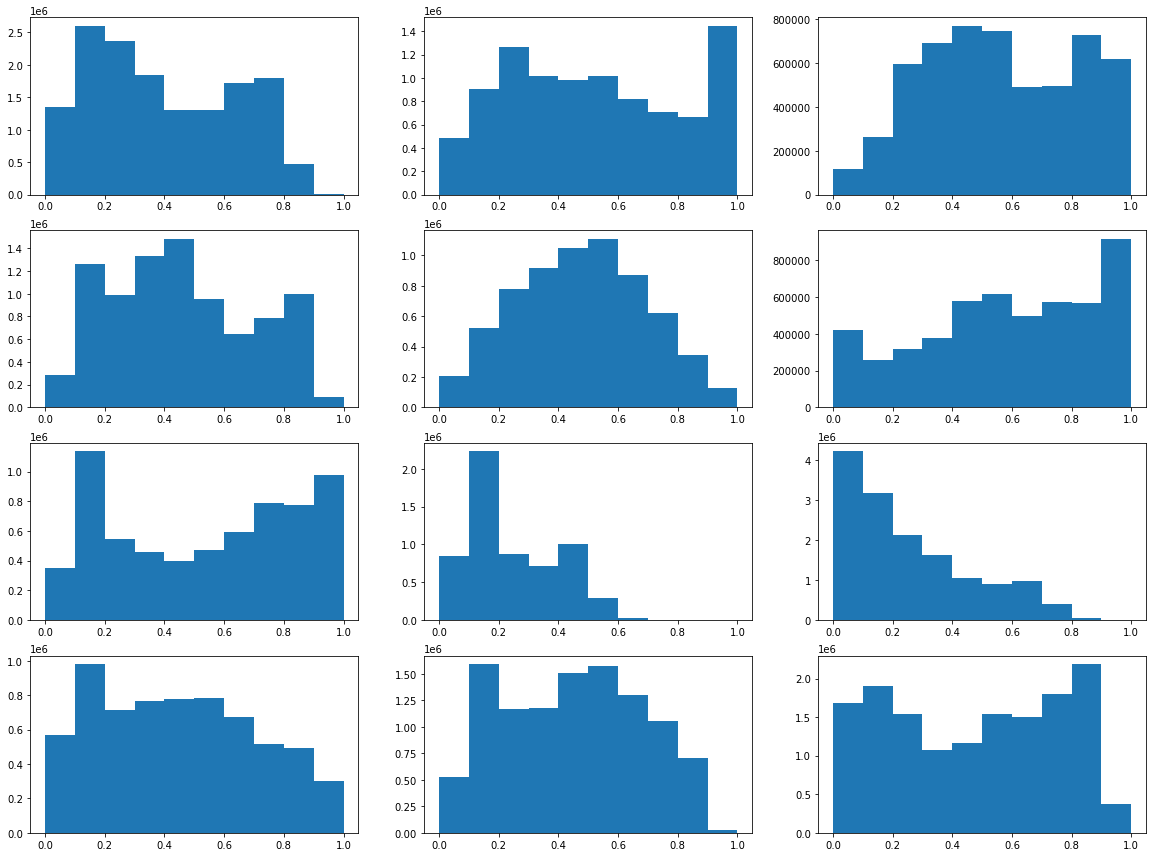

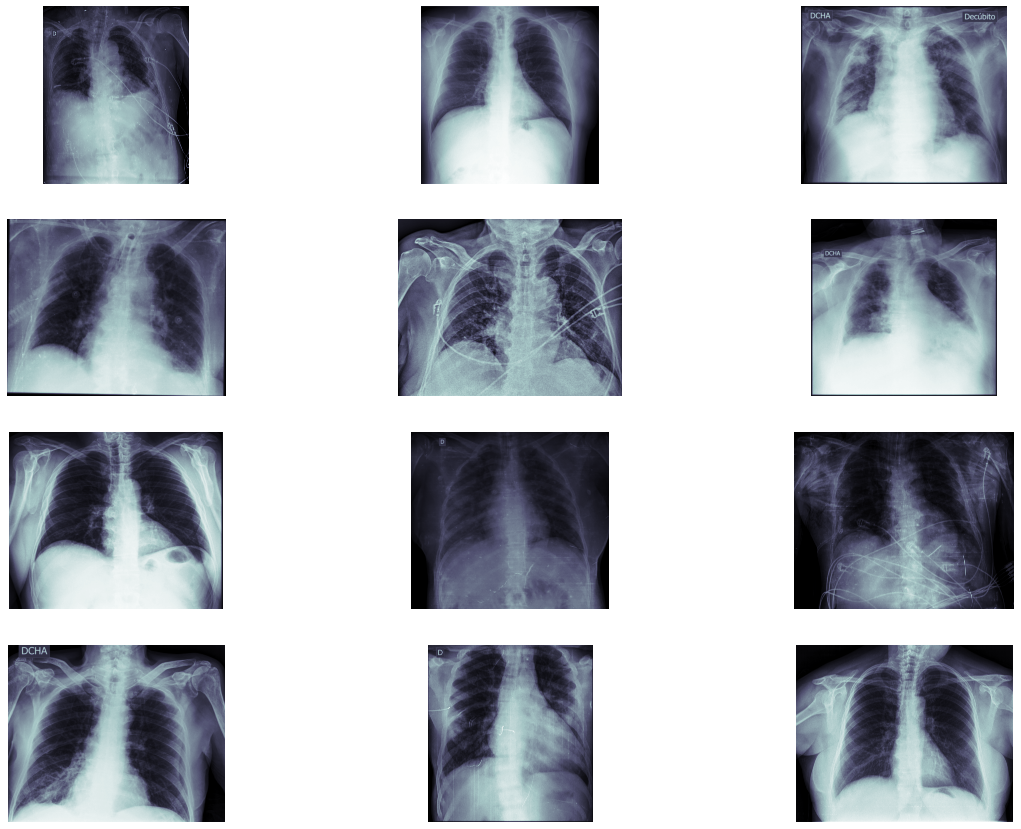

In [93]:
show_hist(samples[i])
plt.show()
show_raw(samples[i])

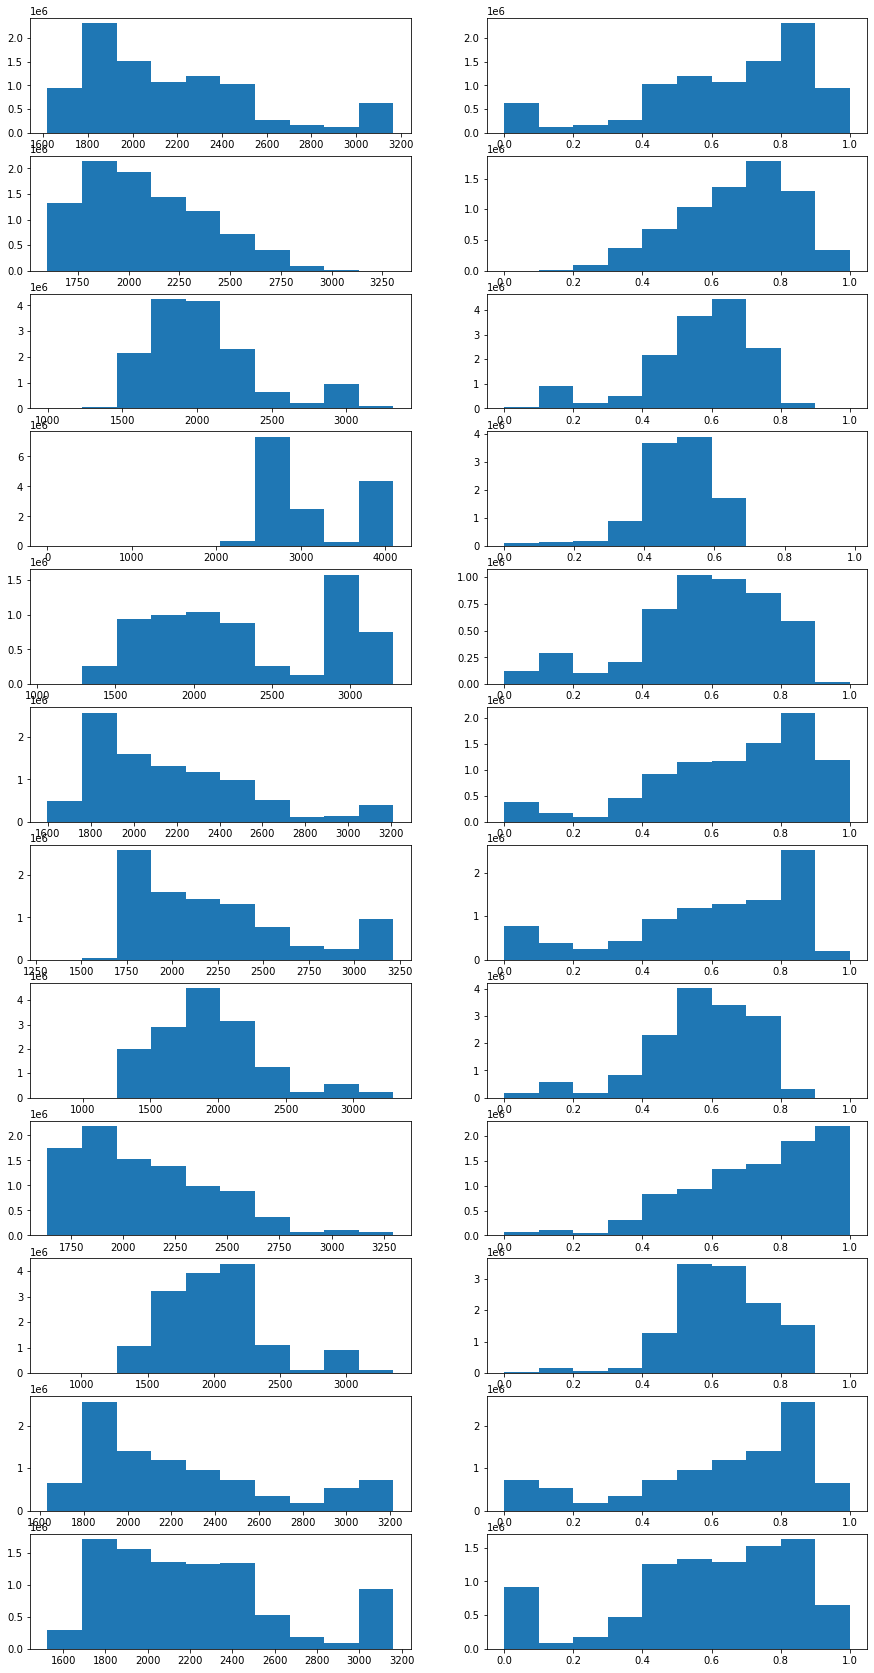

In [72]:
i = 2
compare_hists(samples[i])

---
---
---

In [23]:
from nbdev.export import notebook2script
notebook2script()

Converted 01_Prepare Dataframe.ipynb.
Converted 02_Prepare Data.ipynb.
Converted 04_Learn_Classifier_timm.ipynb.
Converted 05_Learn_bbox.ipynb.
Converted 05_Learn_bbox_ice.ipynb.
Converted 05_Learn_bbox_single_label.ipynb.
Converted 06_Predict.ipynb.
Converted Change dataframe fileformat.ipynb.
Converted Dicom Prep.ipynb.
Converted notmine_train-covid-19-detection-using-yolov5.ipynb.
